In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import quad
import os

In [2]:
lmax = 2000
Tcmb  = 2.726e6    # CMB temperature in microkelvin?
rlmin, rlmax = 2, 2000 # CMB multipole range for reconstruction
nside = 2048
bstype = 'equi'
nsims = 448 # Number of simulations to average over (in sets of 3) 
ellmin = 2 
ellmax = 2000 ##### check!!!! vs sims
ls, cl_unl, cl_len, cl_phi = np.loadtxt('/home/amb257/kappa_bispec/make_sims_parallel/camb_lencl_phi.txt')
L_lots = np.arange(rlmax+1)
Lfac = (L_lots*(L_lots+1.) / 2 )**2
lcl = cl_len[0:rlmax+1] / Tcmb**2
print('lcl not interp', lcl[lmax])
ucl = cl_unl[0:rlmax+1] / Tcmb**2 #dimless unlensed T Cl
cl_kappa = Lfac * cl_phi[0:rlmax+1]
l_bins = np.arange(0,100,10)
cl_where = cl_kappa[l_bins]
print(cl_where)

lcl not interp 4.6554353095210565e-17
[0.00000000e+00 1.66870490e-07 2.06031272e-07 2.17543630e-07
 2.17004910e-07 2.10657754e-07 2.01537811e-07 1.91161657e-07
 1.80472047e-07 1.69897924e-07]


In [3]:
# Load in optimal estimator results
L_opt_fold, opt_est_fold, err_fold = np.loadtxt('../../opt_est_results/folded_opt_est.txt')
L_opt_equi, opt_est_equi, err_equi = np.loadtxt('../../opt_est_results/equilateral_opt_est.txt')


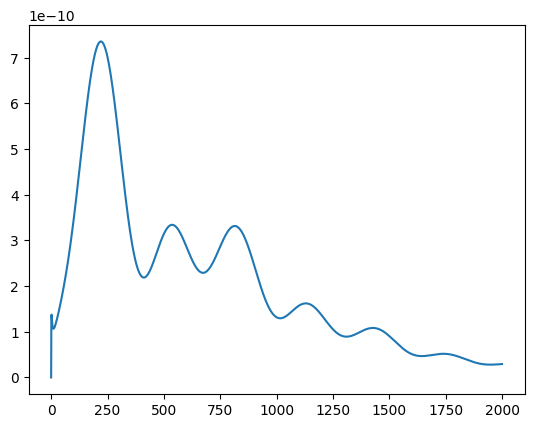

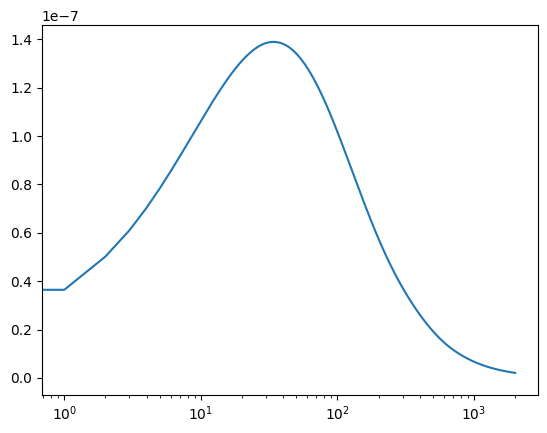

In [4]:
# Running some checks on the power spectra used

# Define the directory where power spec are stored
input_dir = "../../power_spec"

# Load the power spec
L = np.load(os.path.join(input_dir, "L.npy"))
cl_phi = np.load(os.path.join(input_dir, "cl_phi.npy"))
ucl = np.load(os.path.join(input_dir, "ucl.npy"))
ctot = np.load(os.path.join(input_dir, "ctot.npy"))

plt.plot(L, L*(L+1) / (2*np.pi) *ucl)
plt.show()
plt.plot(L, (L*(L+1))**2*cl_phi /  (2*np.pi))
plt.xscale('log')
plt.show()

L [30. 50. 70. 90.] eq_noseries [ 3.03933402e-14 -3.01470487e-14 -3.67276155e-14 -3.38285601e-14]


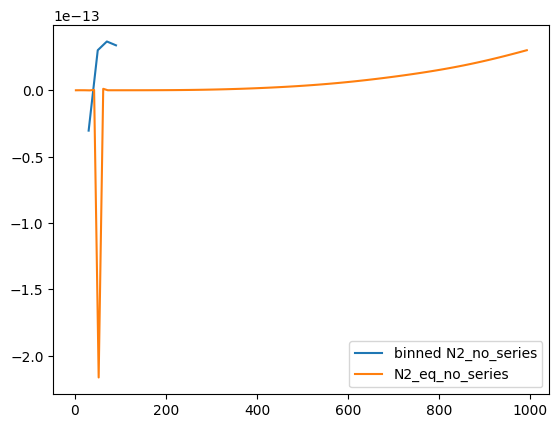

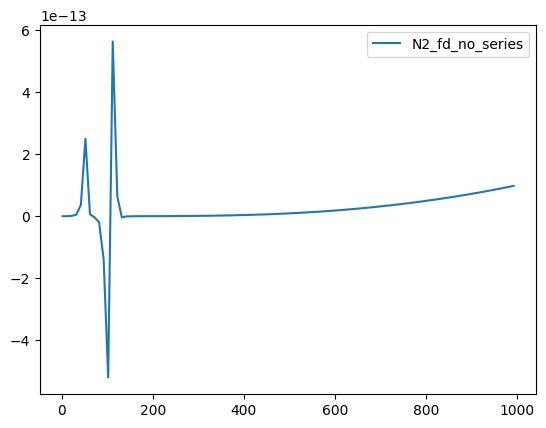

In [5]:
# Import N2 no series equilateral binned full result 
L_eq_noseries_bin, eq_noseries_bin = np.load('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/no_series_binned_equilateral.npy')
print('L', L_eq_noseries_bin,'eq_noseries', eq_noseries_bin)
plt.plot(L_eq_noseries_bin, -1*eq_noseries_bin, label='binned N2_no_series')

L_eq_noseries, eq_noseries = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/noseries_equilN2_from_full_int.txt')
plt.plot(L_eq_noseries, -1*eq_noseries, label='N2_eq_no_series')
plt.legend()
plt.show()
L_fd_noseries, fd_noseries = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/noseries_foldN2_from_full_int.txt')
plt.plot(L_fd_noseries, -1*fd_noseries, label='N2_fd_no_series')
plt.legend()

equi_L30 4.261229151653761e-15


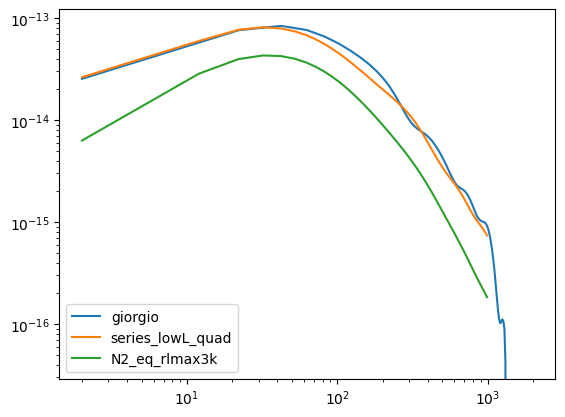

In [6]:
LensingL, testquad = np.loadtxt('../../No_l_factors_mathematica_TEST_quad_equi.txt')
L_eq_rlmax3k, N2_eq_rlmax3k = np.loadtxt('../../Low_L_equi_rlmax3000.txt')
L_r3k_fac = (L_eq_rlmax3k*(L_eq_rlmax3k+1.))**3 / 8
#LensingL, testdirect = np.loadtxt('TEST_direct_equi.txt')
_, minusincorrect_testquad = np.loadtxt('../../minusincorrect_TEST_quad_equi.txt')
_, minusincorrect_testdirect = np.loadtxt('../../minusincorrect_TEST_direct_equi.txt')

# Import N2 no series equilateral binned full result 
L_eq_noseries, eq_noseries = np.load('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/no_series_binned_equilateral.npy')
# import giorgio results
L_analytic, N2_6pt = np.loadtxt("/home/amb257/kappa_bispec/optimal_est/Plots/data/data_for_paper/numerical_N2/Giorgio_equi_N2_analytic.txt")
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.loglog(LensingL, ((LensingL+1) / LensingL)**2 *1/8*(LensingL*(LensingL+1))**3 * testquad, label='series_lowL_quad')
plt.loglog(L_eq_rlmax3k, L_r3k_fac*N2_eq_rlmax3k, label='N2_eq_rlmax3k')
#plt.loglog(LensingL, -1*testdirect, ls = '--', label='series_lowL_directsum')
#plt.loglog(LensingL, minusincorrect_testquad, label='minusincorrect_series_lowL_quad')
#plt.xlim(1,200)
plt.legend()

print('equi_L30', L_r3k_fac[30]*N2_eq_rlmax3k[30])

[ 3.41457490e-14 -1.01702169e-20 -5.02763407e-22 -2.78321294e-23
 -1.94072928e-24 -1.82292214e-25 -2.24340689e-26  2.19453983e-27
  6.72236612e-27  3.55347238e-27  1.53924619e-27  1.09775375e-27
  5.43044816e-28  2.87067491e-28  1.49095886e-28  8.12457529e-29
  4.34811871e-29  2.36873876e-29  1.37910322e-29  7.65095154e-30
  4.81116848e-30  2.97700899e-30  2.04160542e-30  1.30893675e-30
  1.01397125e-30  6.81709988e-31  5.15618872e-31  3.98831427e-31
  3.01304296e-31  2.44440197e-31  1.72048433e-31  1.47116622e-31
  9.96936721e-32  7.34436440e-32  5.25541766e-32  4.22608184e-32
  3.30205659e-32  2.45733091e-32  1.88395376e-32  1.43755979e-32
  1.21032937e-32  9.73999818e-33  7.73660803e-33  6.09305263e-33
  4.92825696e-33  4.05377788e-33  3.29125718e-33  2.62868736e-33
  2.13602641e-33  1.74520107e-33]


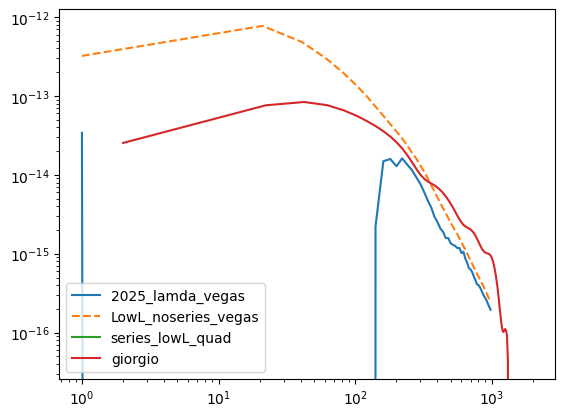

In [7]:
input_dir = "../../vegas_results"
L = np.load(os.path.join(input_dir, "L.npy"))
lambda_L = np.load(os.path.join(input_dir, "lambda_L.npy"))
lambda_vegas_lowL = np.load(os.path.join(input_dir, "2025_lambda_VEGAS_lowL.npy"))
print(lambda_vegas_lowL)

Lfac_kappa = (0.5*L*(L+1))**3 
lambda_Lfac = (0.5*lambda_L*(lambda_L+1))**3 
vegas_lowL = np.load(os.path.join(input_dir, "VEGAS_lowL.npy"))
nonoise_vegas_lowL = np.load(os.path.join(input_dir, "nonoise_VEGAS_lowL.npy"))

#plt.loglog(L, Lfac_kappa*nonoise_vegas_lowL, label = 'nonoise_LowL_noseries_vegas')
plt.loglog(lambda_L, lambda_Lfac*lambda_vegas_lowL,label = '2025_lamda_vegas')
plt.loglog(L, Lfac_kappa*vegas_lowL, ls = '--',label = 'LowL_noseries_vegas')
plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')

#plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.legend()

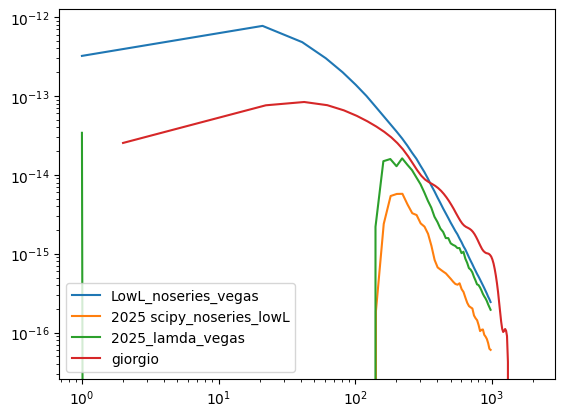

In [8]:
input_dir = "../../scipy_results"
L_scipy = np.load(os.path.join(input_dir, "L.npy"))

Lfac_kappa_scipy = (0.5*L_scipy*(L_scipy+1))**3 
scipy_lowL = np.load(os.path.join(input_dir, "2025scipy_lowL_noseries.npy"))
plt.loglog(L, Lfac_kappa*vegas_lowL, label = 'LowL_noseries_vegas')

#plt.loglog(L, Lfac_kappa*nonoise_vegas_lowL, label = 'nonoise_LowL_noseries_vegas')
plt.loglog(L_scipy, Lfac_kappa_scipy*scipy_lowL, label = '2025 scipy_noseries_lowL')
plt.loglog(lambda_L, lambda_Lfac*lambda_vegas_lowL,label = '2025_lamda_vegas')

#plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.legend()

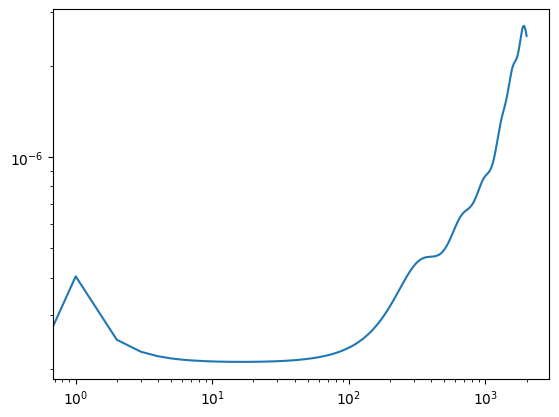

In [9]:
L_norm, norm_phi = np.loadtxt('../../norm_phi.txt')
Lfac_norm = (0.5*L_norm*(L_norm+1.))**2
plt.loglog(L_norm, Lfac_norm*norm_phi)
#This looks legit.

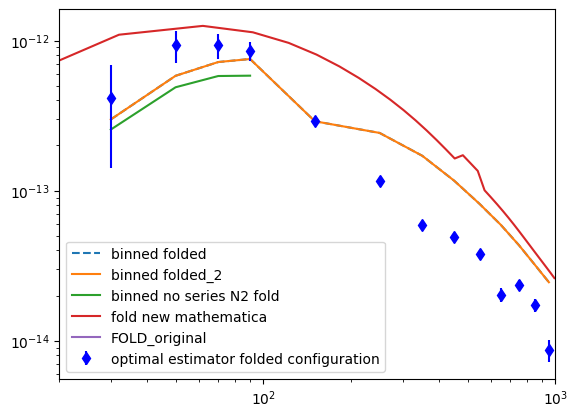

In [10]:
""" Now test folded series expansion N2 """

### Notes - shape driven almost totally by setting A1,2,3. Setting A(L/2) twice and A(L) then leaving Clphis as C(L) gives pretty much bang on. Why wouldn't the clphi"s L change though?
### Changing to any Clphi(L/2) makes it too large (even just one of the two)
bin_mid_fld, binning_test_fld = np.load('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/binned_folded.npy')
bin_mid_fld_2, binning_test_fld_2 = np.load('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/binned_folded_2.npy')

L_redo, N2_redo = np.loadtxt('../../n2_bias_results.txt')
LensingL_fold, N2_fold = np.loadtxt('../../N2_fold.txt')
LensingL_fold, direct_fold = np.loadtxt('../../direct_fold.txt')
L_samenorm, fold_samenorm = np.loadtxt('../../same_norm_quad_fold.txt')
L_newmathematica, fold_N2_newmathematica = np.loadtxt('../../new_mathematica_N2_fold.txt')
Lfac = LensingL_fold*(LensingL_fold+1)  * (LensingL_fold/2*(LensingL_fold/2+1))**2
Lfac_mathematica = L_newmathematica*(L_newmathematica+1)  * (L_newmathematica/2*(L_newmathematica/2+1))**2
L_noseries, N2_noseries = np.load('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/no_series_binned_folded.npy')

L_As_same, fold_As_same = np.loadtxt('../../allAs_same_norm_quad_fold.txt')
L_opt_fold, opt_est_fold, err_fold = np.loadtxt('../../folded_opt_est.txt')
plt.loglog(bin_mid_fld, binning_test_fld, ls = '--', label = 'binned folded')
plt.loglog(bin_mid_fld_2, binning_test_fld_2, label = 'binned folded_2')
plt.loglog(L_noseries, N2_noseries, label = 'binned no series N2 fold')
plt.loglog(L_newmathematica, 1/8*Lfac_mathematica * fold_N2_newmathematica, label='fold new mathematica')
plt.errorbar(L_opt_fold, -1*opt_est_fold, yerr = err_fold, fmt='bd', label = 'optimal estimator folded configuration')
#plt.loglog(LensingL_fold, -1/8*Lfac*N2_fold, label='FOLD_original')
plt.loglog(LensingL_fold, -1/8*(LensingL_fold*(LensingL_fold+1))**3*direct_fold, label='FOLD_original')

plt.xlim(20,1000)
#plt.ylim(1e-13, 1e-12)
plt.legend()

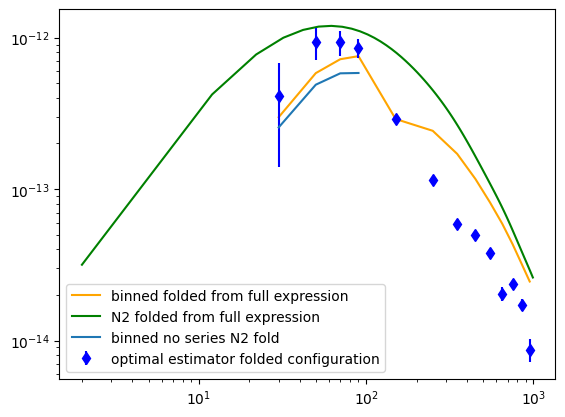

In [11]:
# test full expression for folded configuration note the full_N2_series_integral.py script computes this for KAPPA 
L_newmath_full, N2_fold_newmath_full = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/foldN2_from_full_int.txt')
#Lfac_bin_fold = 1/8 * (L_test_fold*(L_test_fold+1)) * (L_test_fold/2*(L_test_fold/2+1))**2
plt.loglog(bin_mid_fld, binning_test_fld, color = 'orange', label = 'binned folded from full expression')
#plt.loglog(L_test_fold, N2_fold_full_test, label = 'test fold from full expression')
plt.loglog(L_newmath_full, N2_fold_newmath_full, color = 'green', label = 'N2 folded from full expression')
plt.errorbar(L_opt_fold, -1*opt_est_fold, yerr = err_fold, fmt='bd', label = 'optimal estimator folded configuration')
#plt.loglog(L_newmathematica, 1/8*Lfac_mathematica * fold_N2_newmathematica, label='N2 folded direct calculation')
plt.loglog(L_noseries, N2_noseries, label = 'binned no series N2 fold')

plt.legend()
# Perhaps the series expansion stops being valid beyond L=200? Maybe there are other terms that partially cancel the dominant term?

[ 30.  50.  70.  90. 150. 250. 350. 450. 550. 650. 750. 850. 950.] [ 4.70167054e-14 -1.98457279e-14 -2.87370727e-14 -2.70369880e-14
  2.23280129e-14 -2.77871817e-15 -2.65588445e-15 -1.66460085e-15
 -1.03294990e-15 -6.74802053e-16 -4.53766402e-16 -3.16896020e-16
 -2.32484148e-16]


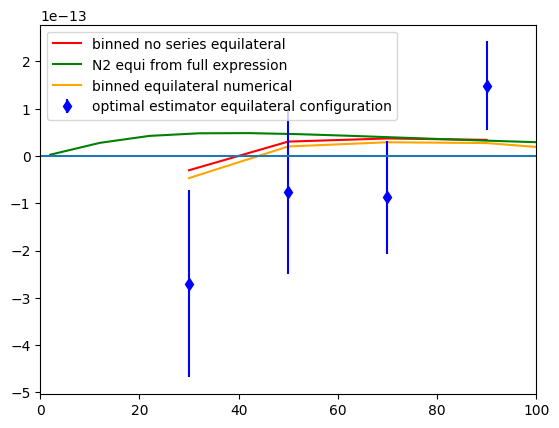

In [12]:
bin_mid_eq, binning_eq = np.load('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/binned_equilateral.npy')
bin_mid_eq_2, binning_eq_2 = np.load('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/binned_equilateral_2.npy')
L_noseries_eq, N2_noseries_eq = np.load('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/no_series_binned_equilateral.npy')
L_full_eq, N2_eq_newmath_full = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/equilN2_from_full_int.txt')

plt.plot(L_noseries_eq, -1*N2_noseries_eq, color = 'red', label = 'binned no series equilateral')
plt.plot(L_full_eq, -1*N2_eq_newmath_full, color = 'green', label = 'N2 equi from full expression')
plt.plot(bin_mid_eq, -1* binning_eq, color = 'orange', label = 'binned equilateral numerical')
#plt.plot(bin_mid_eq_2, -1* binning_eq_2, color = 'pink', ls = '--', label = 'binned equilateral numerical 2')
plt.errorbar(L_opt_equi, opt_est_equi, yerr = err_equi, fmt='bd', label = 'optimal estimator equilateral configuration')
plt.hlines(0, 0, 1000)
plt.xlim(0,100)
#plt.ylim(-3e-14, 1.5e-14)
plt.legend()
print(bin_mid_eq, binning_eq)

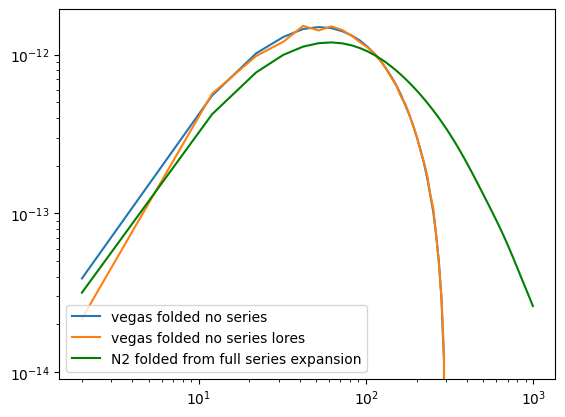

In [25]:
# This cell tests the folded non series direct calculation from non_series/Fold_no_series.py

L_fold_noseries, N2_fold_noseries = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/fold_N2_no_series.txt")
L_vegas_fold_noseries, N2_vegas_fold_noseries = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/vegas_fold_N2_no_series.txt")
L_vegas_fold_noseries_logspace, N2_vegas_fold_noseries_logspace = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/logspace_vegas_fold_N2_no_series.txt")
L_vegas_fold_lores, N2_vegas_fold_lores = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/lowres_vegas_fold_N2_no_series.txt")

#dblquad
#plt.loglog(L_fold_noseries, N2_fold_noseries, label = 'folded no series')

#vegas
plt.loglog(L_vegas_fold_noseries, N2_vegas_fold_noseries, label = 'vegas folded no series')
plt.loglog(L_vegas_fold_lores, N2_vegas_fold_lores, label = 'vegas folded no series lores')


# vegas logspace
#plt.plot(L_vegas_fold_noseries_logspace, N2_vegas_fold_noseries_logspace, color = 'red', label = 'vegas folded no series logspace')
# For comparison plot the folded series expansion result obtained from limit of full expression
plt.plot(L_newmath_full, N2_fold_newmath_full, color = 'green', label = 'N2 folded from full series expansion')

# And finally the folded result from the optimal estimator
#plt.errorbar(L_opt_fold, -1*opt_est_fold, yerr = err_fold, fmt='bd', label = 'optimal estimator folded configuration')
#plt.xlim(80,350)
plt.legend()

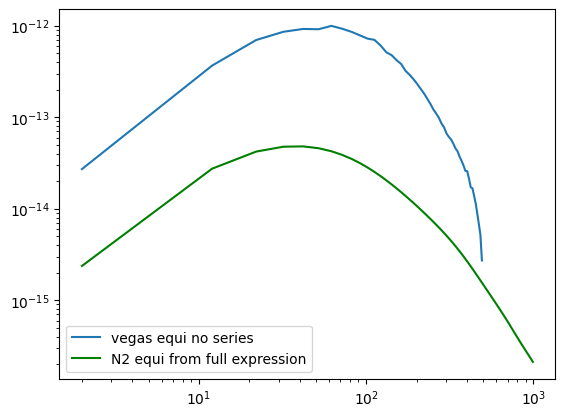

In [14]:
# This cell tests the equilateral non series direct calculation from non_series/Fold_no_series.py

L_vegas_equi_noseries, N2_vegas_equi_noseries = np.loadtxt("/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/vegas_equi_N2_no_series.txt")

#vegas
plt.loglog(L_vegas_fold_noseries, N2_vegas_fold_noseries, label = 'vegas equi no series')

# For comparison plot the folded series expansion result obtained from limit of full expression
plt.plot(L_full_eq, -1*N2_eq_newmath_full, color = 'green', label = 'N2 equi from full expression')

# And finally the folded result from the optimal estimator
#plt.errorbar(L_opt_fold, -1*opt_est_fold, yerr = err_fold, fmt='bd', label = 'optimal estimator folded configuration')

plt.legend()

In [15]:
# Load in the integrand used for the direct sum calculation
ell, integrand = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/integrand_direct_sum_10.0.txt')
plt.plot(ell, integrand)
print(np.sum(integrand))
integral = np.trapz(integrand, ell)
print(integral)
plt.xlim(20,800)

OSError: /home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/integrand_direct_sum_10.0.txt not found.

In [ ]:
L, direct_int = np.loadtxt('new_direct_sum_integeral.txt')
#L, direct_int = np.loadtxt('integral_direct_sum_10.0.txt')
plt.plot(L, direct_int)
plt.xlabel('L')
print(direct_int)

: 

In [ ]:
plt.loglog(L_lots, cl_kappa**2)
plt.xlim(20,1000)

: 

: 

In [ ]:
L, ctotprime = np.loadtxt('ctotprime.txt')
L, lclprime = np.loadtxt('lclprime.txt')
L, lcldoubleprime = np.loadtxt('lcldoubleprime.txt')
L, lcl = np.loadtxt('lcl.txt')
L, ocl = np.loadtxt('ocl.txt')
plt.plot(L, L* lclprime / lcl, label='lclprime')
plt.plot(L, L* ctotprime / lcl, label = 'ctotprime')
plt.xscale('log')
plt.legend()

: 

In [ ]:
plt.plot(L, L* ctotprime / lcl - L* lclprime / lcl)

: 

In [ ]:
plt.loglog(L, lcl, label = 'lcl')
plt.loglog(L, ocl-lcl, label = 'ocl-lcl')
plt.legend()

: 

In [ ]:
print(lcl[0:2])
print(ocl[0:2])

: 

In [ ]:
plt.plot(L, L**2 / lcl * lcldoubleprime)

: 

In [ ]:
import numpy as np
from numpy import random 
from scipy.integrate import quad
# Define a random integrand
def integrand_fn(ell):
    integrand = 1e-11*np.cos(ell / 100) * np.sin(ell / 300) + random.rand()*1e-12
    return integrand

# Set integration limits
ellmin = 2
ellmax = 100

integrand_values = []
for ell in np.arange(ellmin, ellmax + 1):
    integrand = integrand_fn(ell)
    integrand_values.append(integrand)

# Now write some code to integrate this using quad
integral_quad, error = quad(integrand_fn, ellmin, ellmax, limit=1000)

# Now compute the same integrand using direct summation
integral_direct_sum = np.sum(integrand_values)

print('quad', integral_quad)
print('direct sum', integral_direct_sum)

: 

In [ ]:
ell = np.arange(ellmin, ellmax + 1)
plt.plot(ell, integrand_values)


: 

: 